author__ ch  
date Dec.8

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
csv3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160123.txt')
csv1 = pd.read_csv('data160116.csv')
csv2 = pd.read_csv('data160130.csv')

# concate two csv files
data = pd.DataFrame(pd.concat([csv1,csv2,csv3])).reset_index(drop = True)

data2_1 = data[(data.DATE > '01/14/2016') & (data.DATE< '01/23/2016')]
data2_2 = data[(data.DATE > '01/21/2016') & (data.DATE< '01/30/2016')]

data2_1['datetime'] = pd.to_datetime(data2_1.DATE + ' ' + data2_1.TIME)
data2_2['datetime'] = pd.to_datetime(data2_2.DATE + ' ' + data2_2.TIME)

data2_1.rename(columns={'EXITS                                                               ': "EXITS"},
              inplace = True)
data2_2.rename(columns={'EXITS                                                               ': "EXITS"},
              inplace = True)


/Users/macbook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/macbook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/macbook/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwarg

In [3]:
#len(sta_zip.zipcode.drop_duplicates())

In [4]:
# zipcodes in nyc
nyczip = pd.read_excel('nyczipcodelist.xls')
# load station name and zipcode data
sta_zip = pd.read_csv('station_zipcode.csv')
sta_zip.rename(columns={'Station Name': 'STATION'}, inplace = True)


nyczipcode = pd.DataFrame(nyczip.drop(nyczip.columns[:2], axis = 1).values.flatten())
nyczipcode = nyczipcode.dropna().astype(int64)
# there are 166 unique zipcodes in nyc (deselect staten island)
print ('there are {} unique zipcodes in nyc (deselect staten island)'.format(len(nyczipcode)))

there are 166 unique zipcodes in nyc (deselect staten island)


In [5]:
sta_zip.STATION = sta_zip.STATION.map(lambda x: x.replace('TH',''))
sta_zip.STATION = sta_zip.STATION.map(lambda x: x.replace('RD',''))
sta_zip.STATION = sta_zip.STATION.map(lambda x: x.replace('ND',''))

print ('pre-deselect zipcodes in nyc station_zipcode shape is {}'.format(sta_zip.shape))

sta_zip_de = sta_zip.loc[sta_zip.zipcode.isin(nyczipcode[0])]
print ('post-deselect zipcodes in nyc station_zipcode shape is {}'.format(sta_zip_de.shape))


pre-deselect zipcodes in nyc station_zipcode shape is (473, 6)
post-deselect zipcodes in nyc station_zipcode shape is (471, 6)


In [6]:
data2_1.STATION.drop_duplicates()

35                  59 ST
539            5 AV/59 ST
1127           57 ST-7 AV
1733                49 ST
2673       TIMES SQ-42 ST
3016      34 ST-HERALD SQ
3661                28 ST
4046                23 ST
4635       14 ST-UNION SQ
5738             8 ST-NYU
6241            PRINCE ST
6661             CANAL ST
7940            CITY HALL
8324         CORTLANDT ST
9703            RECTOR ST
10170     WHITEHALL S-FRY
10800      DELANCEY/ESSEX
11092              BOWERY
11342         CHAMBERS ST
11888           FULTON ST
12517            BROAD ST
13063                7 AV
13231          PARK PLACE
13441      BOTANIC GARDEN
13609       PROSPECT PARK
13955         PARKSIDE AV
14084           CHURCH AV
14686       BEVERLEY ROAD
14812        CORTELYOU RD
14938       NEWKIRK PLAZA
               ...       
383175         MT EDEN AV
383355             176 ST
383531        BURNSIDE AV
383741             183 ST
384542       MOSHOLU PKWY
384938           WOODLAWN
385148    CENTRAL PK N110
386951      

In [7]:
data1 = pd.merge(data2_1,sta_zip_de, on = 'STATION', sort = False)
data2 = pd.merge(data2_2,sta_zip_de, on = 'STATION', sort = False)
print ('before merge, bomb week data shape {}, compare week {}'.format(data2_1.shape,data2_2.shape))
print ('after merge, data shape {}, compare week {}'.format(data1.shape,data2.shape))

before merge, bomb week data shape (215098, 13), compare week (127003, 13)
after merge, data shape (214154, 18), compare week (131386, 18)


In [8]:
group_bweek = data2.groupby(['zipcode','datetime']).sum()
group_cweek = data1.groupby(['zipcode','datetime']).sum()

In [9]:
len(set(sta_zip_de['zipcode']))

121

In [10]:
zipcodelist_b = group_bweek.index.levels[0]
zipcodelist_c = group_cweek.index.levels[0]

In [11]:
c_time = group_cweek.loc[11693].index
b_time = group_bweek.loc[11693].index
c_day = list(set(c_time.day))
b_day = list(set(b_time.day))
#.groupby()#.groupby()

In [12]:
print b_day
print c_day

[22, 23, 24, 25, 26, 27, 28, 29]
[15, 16, 17, 18, 19, 20, 21, 22]


In [13]:
day_fraction_ent = pd.DataFrame(columns = zipcodelist_b, index = range(0,7))
day_fraction_ex = pd.DataFrame(columns = zipcodelist_b, index = range(0,7))
day_ex_c = pd.DataFrame(columns = zipcodelist_b, index = range(0,7))
day_ex_b = pd.DataFrame(columns = zipcodelist_b, index = range(0,7))
day_ent_c = pd.DataFrame(columns = zipcodelist_b, index = range(0,7))
day_ent_b = pd.DataFrame(columns = zipcodelist_b, index = range(0,7))
#day_fraction.shape

In [14]:
c = group_cweek.loc[10002]

print c['ENTRIES'][c.index.day == c_day[7]][0] 
print c['ENTRIES'][c.index.day == c_day[6]][0]

204194933.0
204159230.0


In [15]:
# calculate entries and exits for each date:
for zipcode in zipcodelist_b:
    c = group_cweek.loc[zipcode]
    b = group_bweek.loc[zipcode]
    #print zipcode
    for i in range(0,7):
        try:
            cent = c['ENTRIES'][c.index.day == c_day[i+1]][0] + c['ENTRIES'][c.index.day == c_day[i+1]][1] -  c['ENTRIES'][c.index.day == c_day[i]][0] - c['ENTRIES'][c.index.day == c_day[i]][1]
            #print c['ENTRIES'][c.index.day == c_day[i]][0]
            bent = b['ENTRIES'][b.index.day == b_day[i+1]][0] + b['ENTRIES'][b.index.day == b_day[i+1]][1] -  b['ENTRIES'][b.index.day == b_day[i]][0] - b['ENTRIES'][b.index.day == b_day[i]][1]
            cex = c['EXITS'][c.index.day == c_day[i+1]][0] -  c['EXITS'][c.index.day == c_day[i]][0]
            bex = b['EXITS'][b.index.day == b_day[i+1]][0] -  b['EXITS'][b.index.day == b_day[i]][0]
            day_fraction_ent.loc[i,zipcode] = (bent - cent)/ cent
            day_fraction_ex.loc[i,zipcode] = (bex - cex) / cex
        except IndexError:
            day_fraction_ent.loc[i,zipcode] = np.nan
            day_fraction_ex.loc[i,zipcode] = np.nan

In [16]:
# calculate entries and exits for each date:
for zipcode in zipcodelist_b:
    c = group_cweek.loc[zipcode]
    b = group_bweek.loc[zipcode]
    #print zipcode
    for i in range(0,7):
        try:
            cent = c['ENTRIES'][c.index.day == c_day[i+1]][0] + c['ENTRIES'][c.index.day == c_day[i+1]][1] -  c['ENTRIES'][c.index.day == c_day[i]][0] - c['ENTRIES'][c.index.day == c_day[i]][1]
            #print c['ENTRIES'][c.index.day == c_day[i]][0]
            bent = b['ENTRIES'][b.index.day == b_day[i+1]][0] + b['ENTRIES'][b.index.day == b_day[i+1]][1] -  b['ENTRIES'][b.index.day == b_day[i]][0] - b['ENTRIES'][b.index.day == b_day[i]][1]
            cex = c['EXITS'][c.index.day == c_day[i+1]][0] -  c['EXITS'][c.index.day == c_day[i]][0]
            bex = b['EXITS'][b.index.day == b_day[i+1]][0] -  b['EXITS'][b.index.day == b_day[i]][0]
            day_ent_b.loc[i,zipcode] = bent
            day_ent_c.loc[i,zipcode] = cent
            day_ex_b.loc[i,zipcode] = bex
            day_ex_c.loc[i,zipcode] = cex
        except IndexError:
            day_ent_b.loc[i,zipcode] = np.nan
            day_ent_c.loc[i,zipcode] = np.nan
            day_ex_b.loc[i,zipcode] = np.nan
            day_ex_c.loc[i,zipcode] = np.nan

In [38]:
day_ent_b

zipcode,10001,10002,10003,10004,10005,10006,10007,10010,10011,10012,...,11385,11417,11418,11421,11432,11435,11691,11692,11693,11694
0,-2.97371e+09,-3.8384e+08,17209,NaN,-5.1152e+08,-6.38681e+08,-6.77134e+08,1.04137e+09,-1.09413e+10,-1.05521e+08,...,14859,2.53407e+08,-3.98649e+07,27282,30869,9497,6702,9135,2437,1668
1,9336,1549,4116,NaN,1094,2570,5467,65502,54244,9452,...,3036,2165,531,4798,5368,2074,615,849,138,103
2,14854,3501,7283,NaN,1613,5106,9336,-1.03143e+10,87940,-4.03981e+08,...,4106,2701,848,10815,11880,3289,1180,1976,112,62
3,47662,6037,14008,NaN,13862,21698,45437,1.03149e+10,293672,28228,...,14587,13832,3506,28486,32040,10233,6365,8491,2096,1529
4,54274,6659,15140,NaN,14595,23688,50238,464973,312377,4.04076e+08,...,15465,15748,3435,29061,32525,10140,6862,9520,2129,1206
5,54360,6291,14849,NaN,13838,22740,-2.43492e+07,472176,319553,55802,...,15497,15673,3342,28804,31552,10114,7030,10209,1961,1134
6,55190,6392,15352,NaN,14979,24654,2.44548e+07,482682,326010,56758,...,15197,15408,3171,28081,31255,9894,7061,10134,2072,1239


In [17]:
day_ent_b.dropna(axis = 1).to_csv('entb.csv')
day_ent_c.dropna(axis = 1).to_csv('entc.csv')
day_ex_b.dropna(axis = 1).to_csv('exb.csv')
day_ex_c.dropna(axis = 1).to_csv('exc.csv')

In [18]:
print day_fraction_ent.shape
print day_fraction_ent.dropna(axis=1).shape

(7, 96)
(7, 80)


In [19]:
# some unique error
cent = c['ENTRIES'][c.index.day == c_day[1]][0] -  c['ENTRIES'][c.index.day == c_day[0]][0]
bent = b['ENTRIES'][b.index.day == b_day[1]][0] -  b['ENTRIES'][b.index.day == b_day[0]][0]
cex = c['EXITS'][c.index.day == c_day[i+1]][0] -  c['EXITS'][c.index.day == c_day[i]][0]
bex = b['EXITS'][b.index.day == b_day[i+1]][0] -  b['EXITS'][b.index.day == b_day[i]][0]
            
#day_fraction_ent.loc[0,11226] == 
#print group_bweek.loc[11226][['ENTRIES','EXITS']][group_bweek.loc[11226].index.day == 23]
#print group_bweek.loc[11226][['ENTRIES','EXITS']][group_bweek.loc[11226].index.day == 22]

In [20]:
# replacing questionable big or small data with 0
day_fraction_ent[(day_fraction_ent > 10) | (day_fraction_ent < -10)] = 0
day_fraction_ex[(day_fraction_ex > 10) | (day_fraction_ex < -10)] = 0

day_fraction_ent.dropna(axis=1, inplace=True)
day_fraction_ex.dropna(axis=1, inplace=True)

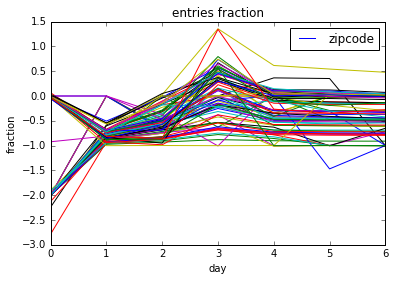

In [21]:
day_fraction_ent.plot()
plt.title('entries fraction')
plt.xlabel('day')
plt.ylabel('fraction')
plt.legend(['zipcode'])
plt.savefig('entries.jpg')

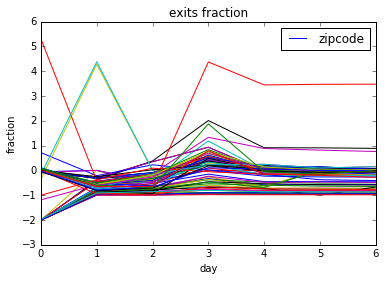

In [22]:
day_fraction_ex.plot()
plt.title('exits fraction')
plt.xlabel('day')
plt.ylabel('fraction')
plt.legend(['zipcode'])
plt.savefig('exits.jpg')

In [23]:
from sklearn import cluster

In [24]:
model = cluster.KMeans(n_clusters=4)

In [25]:
entclu = model.fit_predict(day_fraction_ent.T)
exclu = model.fit_predict(day_fraction_ex.T)

clusterresult = pd.DataFrame(day_fraction_ent.columns)
clusterresult['entries'] = entclu
clusterresult['exits'] = exclu
clusterresult.to_csv('cluster_result.csv')

In [26]:
day_fraction_ent1 = np.array(day_fraction_ent.copy())
#day_fraction_ent1.shape = [1,day_fraction_ent1.shape[0] * day_fraction_ent1.shape[1]]
#plt.table?day_fraction_ent1
#day_fraction_ent.table

In [27]:
day_fraction_ent1.flatten()

ent = day_fraction_ent1.flatten()
a = ent.max()
b = ent.min()
day_fraction_ent1 = (day_fraction_ent1 - b)/(a-b)
#day_fraction_ent1.reshape(1 , day_fraction_ent1.shape[0] * day_fraction_ent1.shape[1])

In [28]:
ent = day_fraction_ent1.flatten()
a = ent.max()
b = ent.min()
day_fraction_ent1 = (day_fraction_ent1 - b)/(a-b)
#day_fraction_ent1.reshape(1 , day_fraction_ent1.shape[0] * day_fraction_ent1.shape[1])

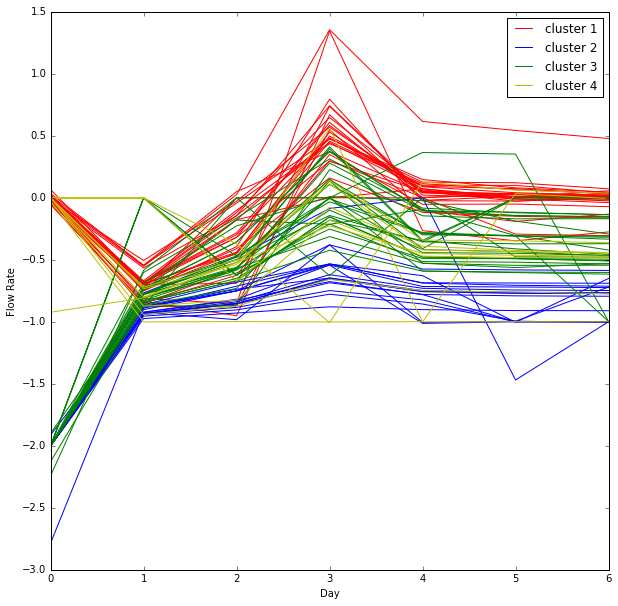

In [29]:
# plot cluster result
p1 = day_fraction_ent.loc[:,day_fraction_ent.columns.isin(clusterresult[clusterresult.entries == 0].zipcode)]
p2 = day_fraction_ent.loc[:,day_fraction_ent.columns.isin(clusterresult[clusterresult.entries == 1].zipcode)]
p3 = day_fraction_ent.loc[:,day_fraction_ent.columns.isin(clusterresult[clusterresult.entries == 2].zipcode)]
p4 = day_fraction_ent.loc[:,day_fraction_ent.columns.isin(clusterresult[clusterresult.entries == 3].zipcode)]

plt.figure(figsize = (10,10))
plt.plot(p1, c = 'r')
plt.plot((0,0),c = 'r', label = 'cluster 1')
plt.plot(p2, c = 'b')
plt.plot((0,0),c = 'b', label = 'cluster 2')
plt.plot(p3, c = 'g')
plt.plot((0,0),c = 'g', label = 'cluster 3')
plt.plot(p4, c = 'y')
plt.plot((0,0),c = 'y', label = 'cluster 4')
plt.xlabel('Day')
plt.ylabel('Flow Rate')
#plt.xticks(['day1','day2','day3','day4','day5','day6','day7'])
plt.legend(loc = 0)
plt.savefig('cluster_result.png')

In [30]:
from sklearn import preprocessing
from scipy.optimize import curve_fit

def func(t, alpha, H):
    return 1/(1+np.exp(-alpha * (t-H)))

In [31]:
x1 = list(range(0,7) * len(p1.T))
y1 = np.array(p1.T).flatten()

OldRange = (y1.max() - y1.min())  
NewRange = 1
OldMin = y1.min()
y1 = pd.DataFrame(y1).apply(lambda x: ((x - OldMin) * NewRange) / OldRange)

popt1, pcov1 = curve_fit(func, x1, y1[0])

array([ 0.11647206,  7.12069228])

In [32]:
x2 = list(range(0,7) * len(p2.T))
y2 = np.array(p2.T).flatten()

OldRange = (y2.max() - y2.min())  
NewRange = 1
OldMin = y2.min()
y2 = pd.DataFrame(y2).apply(lambda x: ((x - OldMin) * NewRange) / OldRange)

popt2, pcov2 = curve_fit(func, x2, y2[0])

In [33]:
x3 = list(range(0,7) * len(p3.T))
y3 = np.array(p3.T).flatten()

OldRange = (y3.max() - y3.min())  
NewRange = 1
OldMin = y3.min()
y3 = pd.DataFrame(y3).apply(lambda x: ((x - OldMin) * NewRange) / OldRange)

popt3, pcov3 = curve_fit(func, x3, y3[0])

In [34]:
x4 = list(range(0,7) * len(p4.T))
y4 = np.array(p4.T).flatten()

OldRange = (y4.max() - y4.min())  
NewRange = 1
OldMin = y4.min()
y4 = pd.DataFrame(y4).apply(lambda x: ((x - OldMin) * NewRange) / OldRange)

popt4, pcov4 = curve_fit(func, x4, y4[0])

In [35]:
print (popt1, popt2, popt3, popt4)

(array([ 0.11647206,  7.12069228]), array([ 0.25616971,  0.24930321]), array([ 0.43397338,  1.39899869]), array([ -0.04275134, -10.07372191]))


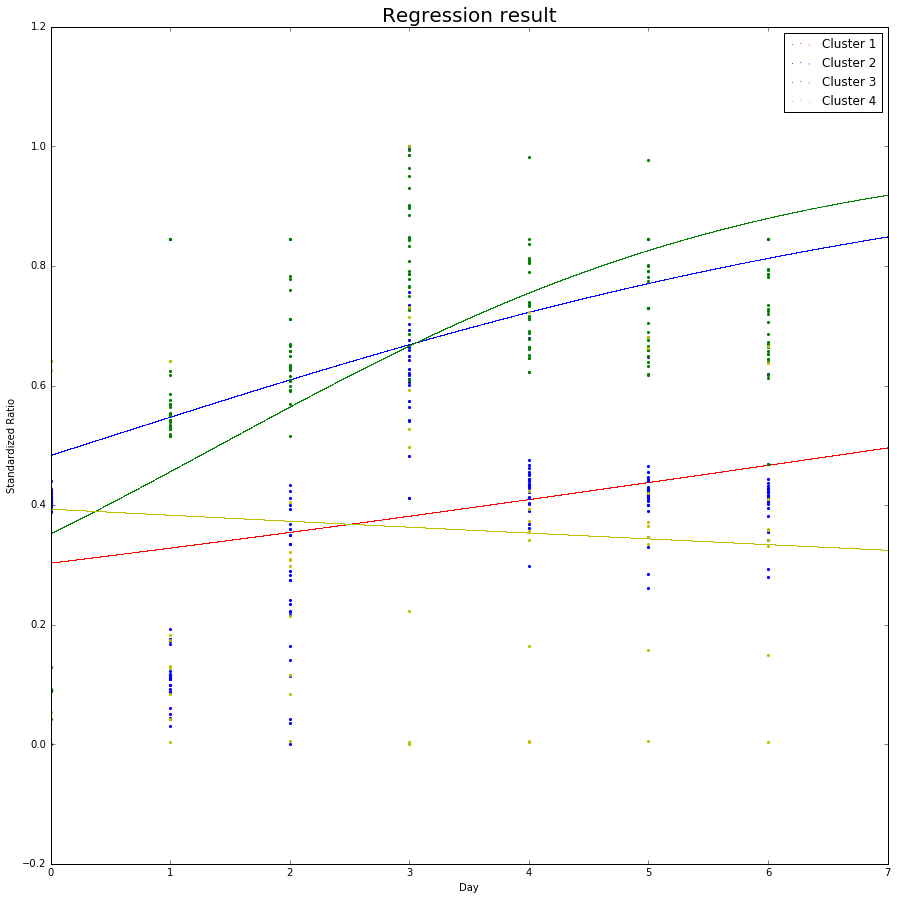

In [39]:
x = np.linspace(0,7,10000)

plt.figure(figsize = (15,15))
plt.scatter(x, func(x,popt1[0],popt1[1]), linewidths=0, c = 'r', s = 1, label = 'Cluster 1')
plt.scatter(x1,y1, c = 'r', s = 1 , lw = 0)
plt.scatter(x, func(x,popt2[0],popt2[1]), linewidths=0, c = 'b', s = 1, label = 'Cluster 2')
plt.scatter(x1,y1, c = 'b', s = 10, lw = 0)
plt.scatter(x, func(x,popt3[0],popt3[1]), linewidths=0, c = 'g', s = 1, label = 'Cluster 3')
plt.scatter(x3,y3, c = 'g', s = 10, lw = 0)
plt.scatter(x, func(x,popt4[0],popt4[1]), linewidths=0, c = 'y', s = 1, label = 'Cluster 4')
plt.scatter(x4,y4, c = 'y', s = 10, lw = 0)
plt.xlim(0,7)
plt.ylabel('Standardized Ratio')
plt.xlabel('Day')
plt.legend(loc = 0)
plt.title('Regression result', fontsize = 20)
plt.savefig('regression result.jpg')

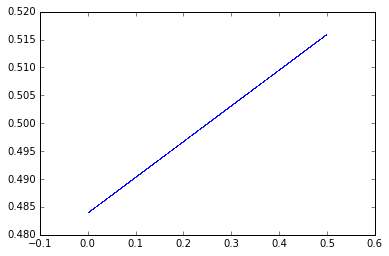

In [40]:
x = np.linspace(0,popt2[1] * 2,2000)
plt.scatter(x, func(x,popt2[0],popt2[1]), linewidths=0, c = 'b', s = 1, label = 'Cluster 2')

/Users/macbook/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


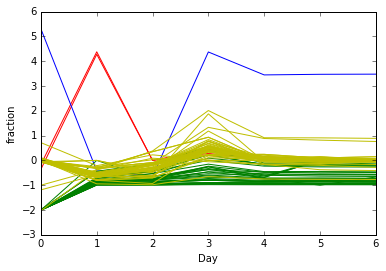

In [41]:
# plot cluster result
p1 = day_fraction_ex.loc[:,day_fraction_ex.columns.isin(clusterresult[clusterresult.exits == 0].zipcode)]
p2 = day_fraction_ex.loc[:,day_fraction_ex.columns.isin(clusterresult[clusterresult.exits == 1].zipcode)]
p3 = day_fraction_ex.loc[:,day_fraction_ex.columns.isin(clusterresult[clusterresult.exits == 2].zipcode)]
p4 = day_fraction_ex.loc[:,day_fraction_ex.columns.isin(clusterresult[clusterresult.exits == 3].zipcode)]

plt.figure()
plt.plot(p1, c = 'r')
plt.plot(p2, c = 'b')
plt.plot(p3, c = 'g')
plt.plot(p4, c = 'y')
plt.xlabel('Day')
plt.ylabel('fraction')
plt.legend()
plt.savefig('cluster_ex.jpg')

In [42]:
# plt.matshow(alpha = day_fraction_ent1)
#plt.table(range(0,6), day_fraction_ent.columns)
fig=plt.figure()
ax = plt.gca()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
colLabels=("day1", "day2", "day3", "day4","day5","day6","day7")
rows=len(day_fraction_ent.columns)
the_table = ax.table(alpha =  colLabels=colLabels, loc='center')
    plt.savefig("table.png")
    
from matplotlib.table import Table
data = day_fraction_ent1
fig, ax = plt.subplots()
ax.set_axis_off()
tb = Table(ax, bbox=[0,0,1,1])
nrows, ncols = data.shape
#width, height = 1.0 / ncols, 1.0 / nrows

for (i,j), val in np.ndenumerate(data):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
    idx = [j % 2, (j + 1) % 2][i % 2]
    alpha1 = data[i,j]

    tb.add_cell(i, j, alpha = alpha1)

SyntaxError: invalid syntax (<ipython-input-42-9d28e7e6e006>, line 9)

In [ ]:
import geopandas

In [ ]:
data = geopandas.GeoDataFrame.from_file('edu_NY.shp')